In [2]:
#dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [1]:
import pandas as pd
df = pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400
...,...,...,...,...,...,...,...
9672,2024-07-31,420.500000,421.779999,412.209991,418.350006,418.350006,42891400
9673,2024-08-01,420.790009,427.459991,413.089996,417.109985,417.109985,30296400
9674,2024-08-02,412.489990,415.000000,404.339996,408.489990,408.489990,29437900
9675,2024-08-05,389.170013,401.040009,385.579987,395.149994,395.149994,40709200


In [3]:
df = df[['Date', 'Close']]
df
print(df.dtypes)


Date      object
Close    float64
dtype: object


In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year, month, day)

datetime_object = str_to_datetime(df['Date'][0])
datetime_object



datetime.datetime(1986, 3, 13, 0, 0)

In [5]:
df['Date'] = df['Date'].apply(str_to_datetime)
df

<ipython-input-5-4f7eeea06d95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9672,2024-07-31,418.350006
9673,2024-08-01,417.109985
9674,2024-08-02,408.489990
9675,2024-08-05,395.149994


In [6]:
#lets replace Date as indices
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-07-31,418.350006
2024-08-01,417.109985
2024-08-02,408.489990


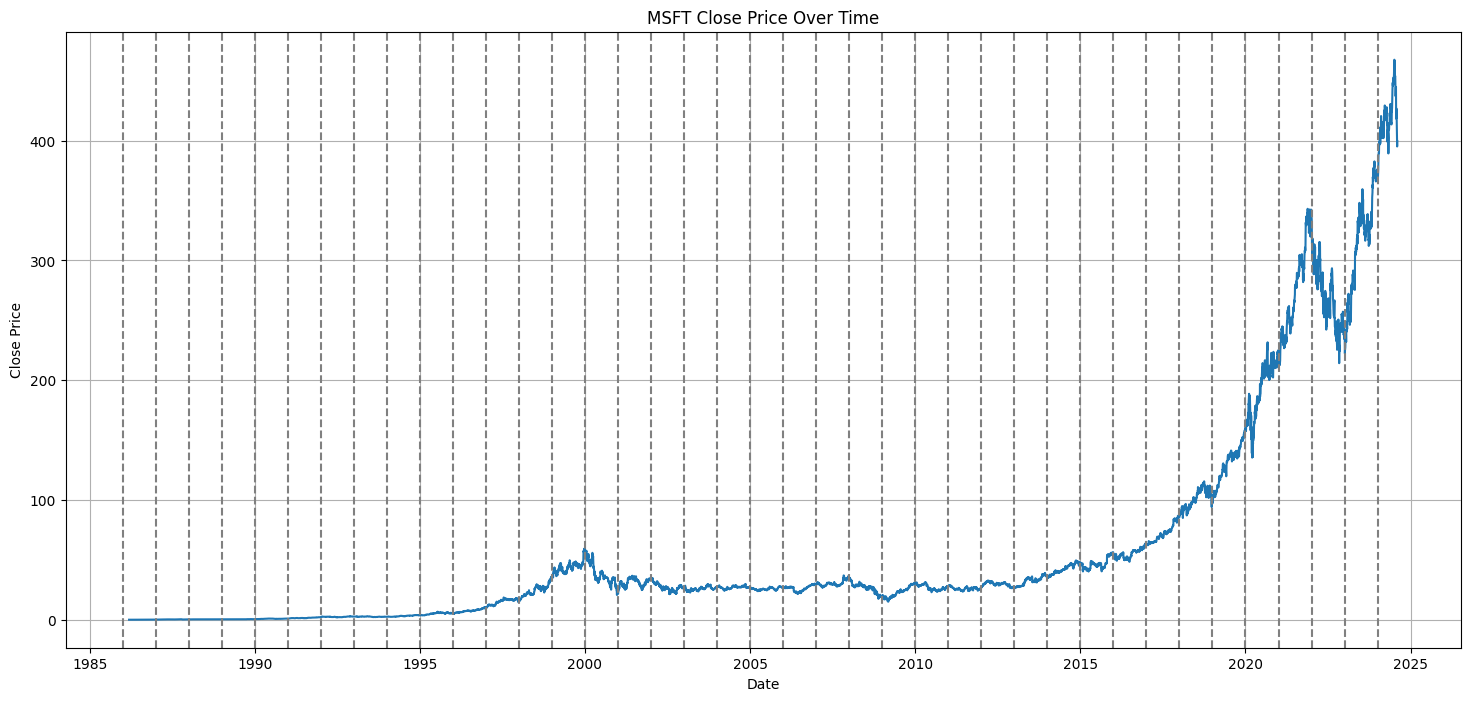

In [16]:


plt.figure(figsize=(18, 8))
plt.plot(df.index, df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('MSFT Close Price Over Time')
plt.grid(True)

# Add year indices
years = pd.Series(df.index.year).unique()
for year in years:
    plt.axvline(datetime.datetime(year, 1, 1), color='gray', linestyle='--')

plt.show()


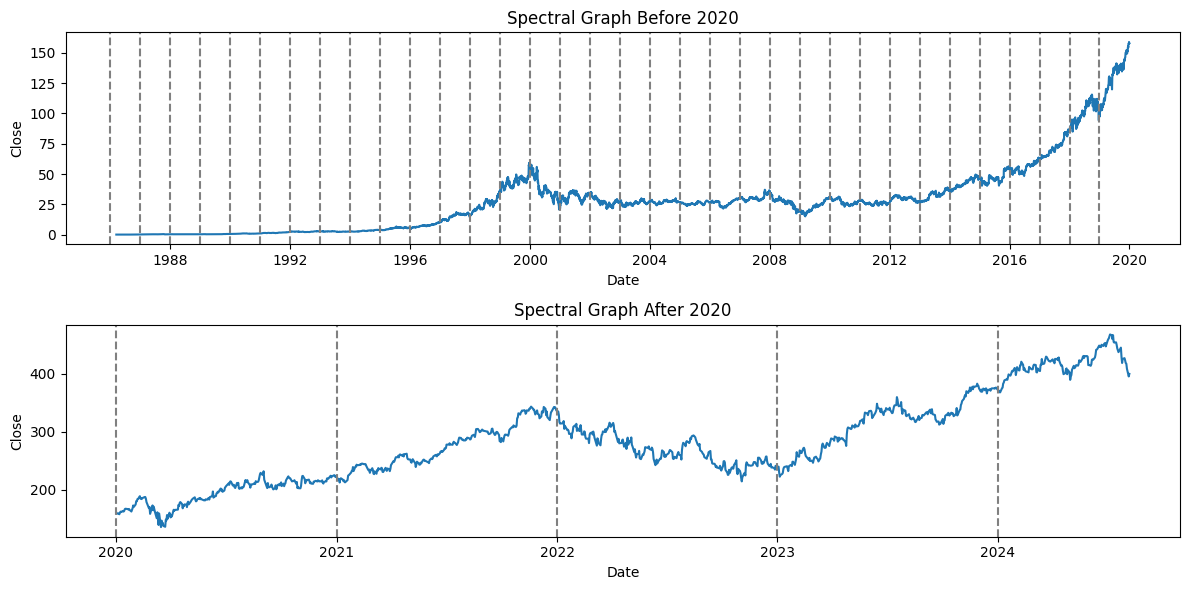

In [21]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

df_before_2020 = df[:'2019']
df_after_2020 = df['2020':]

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df_before_2020.index, df_before_2020['Close'])
plt.title('Spectral Graph Before 2020')
plt.xlabel('Date')
plt.ylabel('Close')


years_before = pd.Series(df_before_2020.index.year).unique()
for year in years_before:
    plt.axvline(datetime.datetime(year, 1, 1), color='gray', linestyle='--')

plt.subplot(2, 1, 2)
plt.plot(df_after_2020.index, df_after_2020['Close'])
plt.title('Spectral Graph After 2020')
plt.xlabel('Date')
plt.ylabel('Close')


years_after = pd.Series(df_after_2020.index.year).unique()
for year in years_after:
    plt.axvline(datetime.datetime(year, 1, 1), color='gray', linestyle='--')

plt.tight_layout()
plt.show()

#to check yearly sesonality

In [22]:
import numpy as np

def df_to_windowed_df(dataframe, first_data_str, last_date_str, n =3):

  first_date = str_to_datetime(first_data_str)
  last_date = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:

    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date + datetime.timedelta(days = 7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day = int(day), month = int(month), year = int(year))


    if last_time:
      break
    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0,n):
    X[:,i]
    ret_df[f'Target- {n-i}'] = X[:,i]

  ret_df['Target Data'] = Y
  return ret_df

  #start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2023-08-06',
                                '2024-08-06',
                                n=3)

windowed_df




,Target Date,Target- 3,Target- 2,Target- 1,Target Data
0,2023-08-06,336.339996,327.500000,326.660004,327.779999
1,2023-08-08,326.660004,327.779999,330.109985,326.049988
2,2023-08-09,327.779999,330.109985,326.049988,322.230011
3,2023-08-10,330.109985,326.049988,322.230011,322.929993
4,2023-08-11,326.049988,322.230011,322.929993,321.010010
...,...,...,...,...,...
247,2024-07-31,425.269989,426.730011,422.920013,418.350006
248,2024-08-01,426.730011,422.920013,418.350006,417.109985
249,2024-08-02,422.920013,418.350006,417.109985,408.489990
250,2024-08-05,418.350006,417.109985,408.489990,395.149994


In [23]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1],1))#Univeriate model

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)
dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

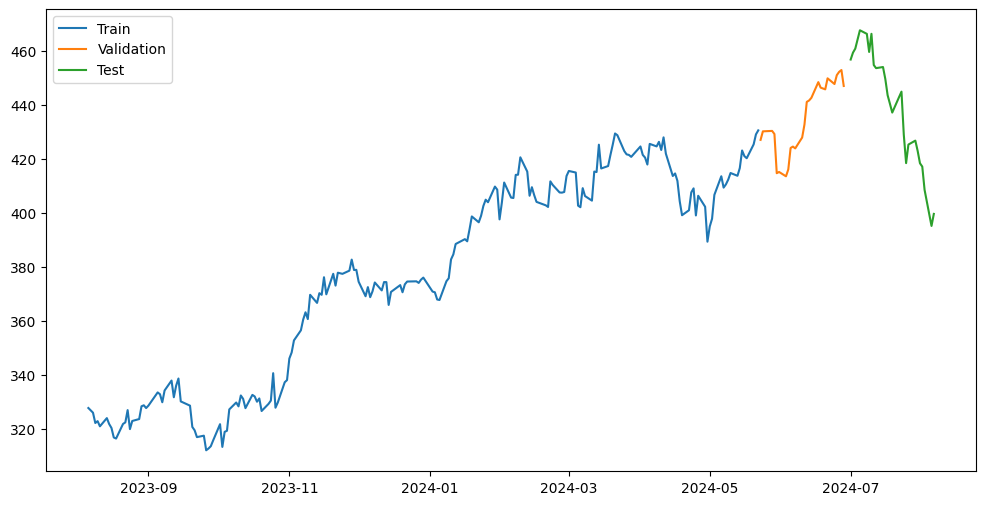

In [25]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize=(12, 6))
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.legend(['Train', 'Validation', 'Test'])


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3,1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(1)])
model.compile(loss = 'mse',
              optimizer = Adam(learning_rate = 0.001),
              metrics = ['mean_absolute_error'])
model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 1000, batch_size = 32)



Epoch 1/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 142921.9062 - mean_absolute_error: 376.2799 - val_loss: 188580.5000 - val_mean_absolute_error: 434.0683
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 141253.9531 - mean_absolute_error: 373.9187 - val_loss: 188069.2656 - val_mean_absolute_error: 433.4789
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 142074.0469 - mean_absolute_error: 375.0464 - val_loss: 187343.9531 - val_mean_absolute_error: 432.6416
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 141156.5625 - mean_absolute_error: 373.7847 - val_loss: 186683.0469 - val_mean_absolute_error: 431.8770
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 141702.0000 - mean_absolute_error: 374.5855 - val_loss: 185952.7812 - val_mean_absolute_error: 431.0308
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 138094.8906 - mean_absolute_error: 369.7357 - val_loss: 185128.5781 - val_mean_absolute_error: 430.0737
Epoch 7/1000
7/7 ━━━━━━━━━━

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


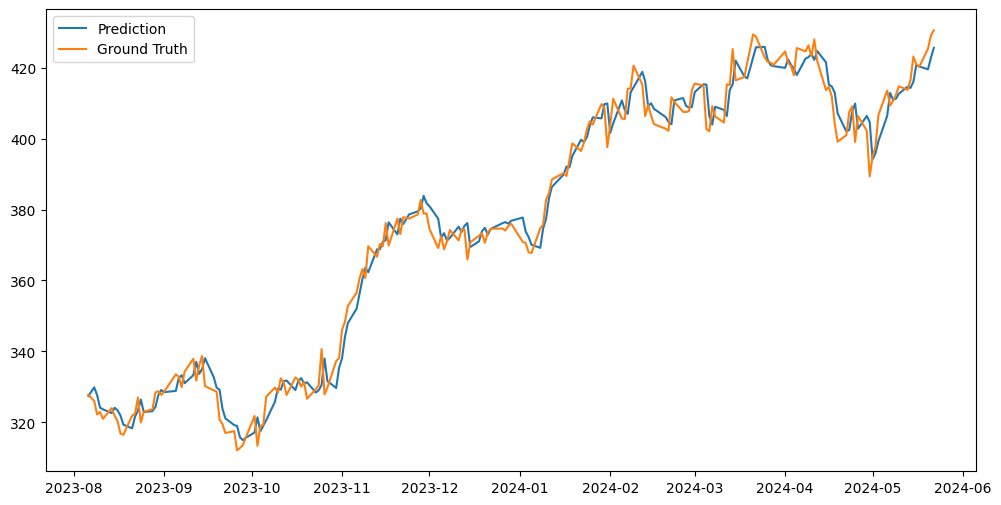

In [27]:


train_predictions = model.predict(X_train).flatten()

plt.figure(figsize=(12, 6))  # Adjust width and height as needed
plt.plot(dates_train, train_predictions, label='Prediction')
plt.plot(dates_train, y_train, label='Ground Truth')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


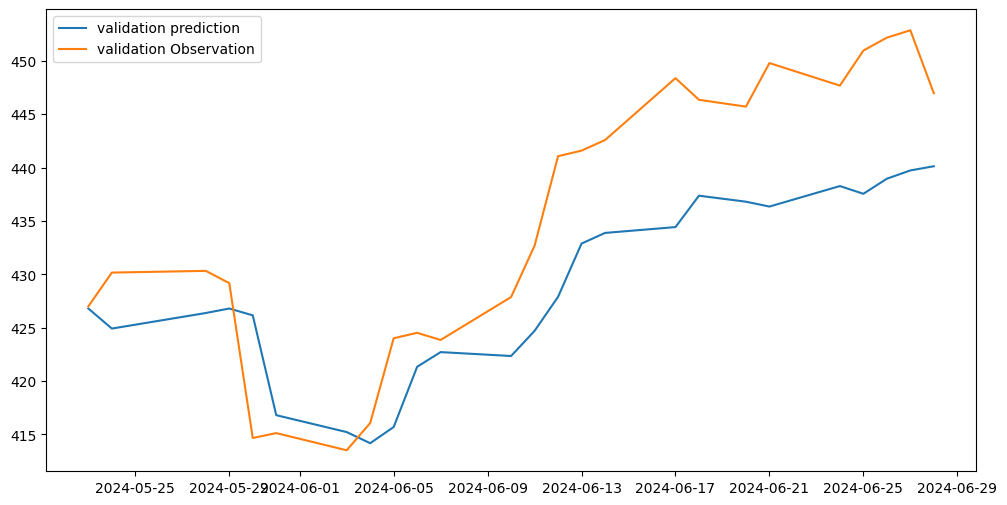

In [28]:
val_predictions = model.predict(X_val).flatten()
plt.figure(figsize=(12, 6))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['validation prediction', 'validation Observation'])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


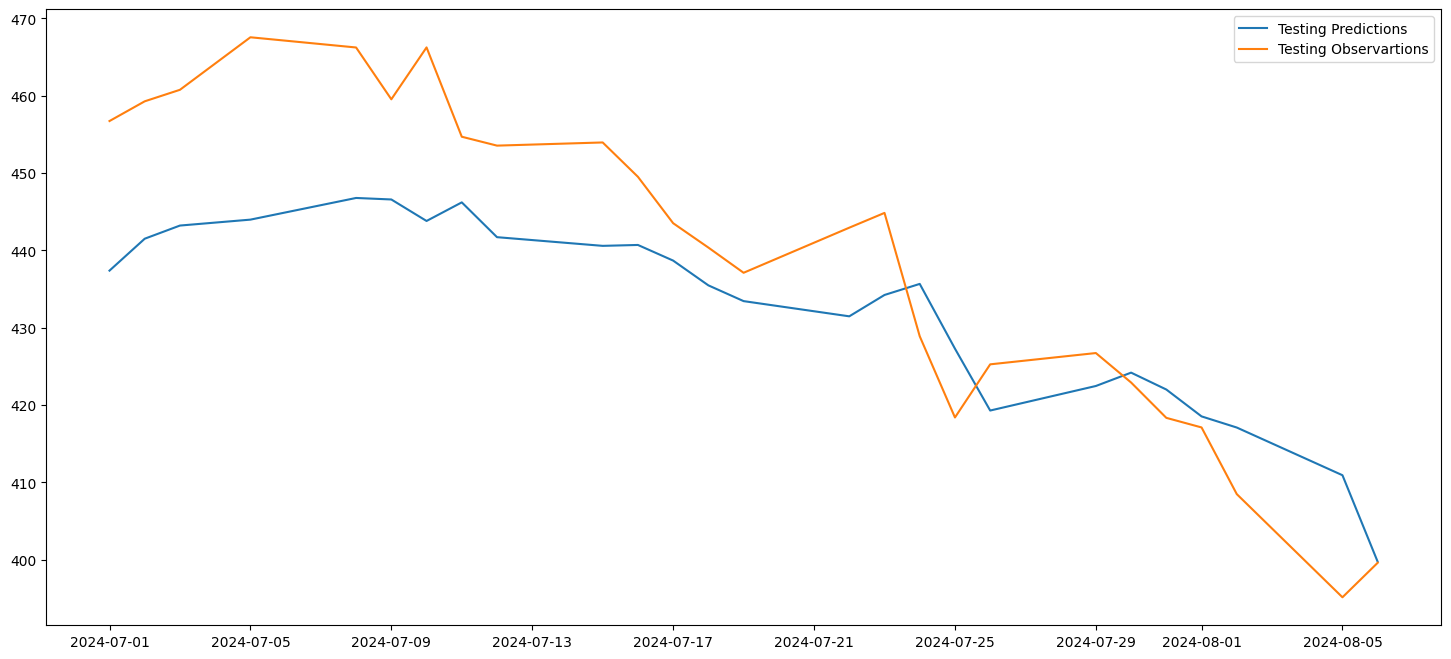

In [29]:
test_predictions = model.predict(X_test).flatten()
plt.figure(figsize=(18, 8))  # Increased figure size
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observartions'])

<Figure size 1800x800 with 0 Axes>

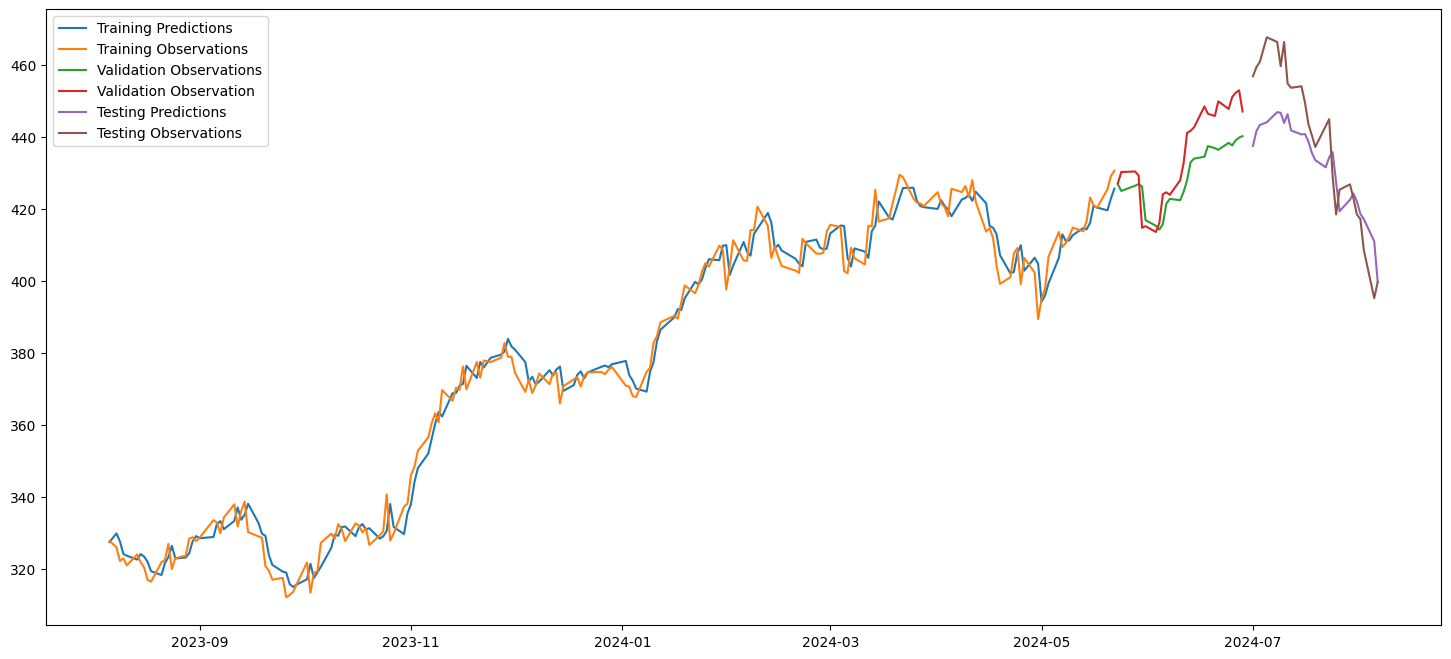

In [30]:
plt.figure(figsize = (18,8))
plt.figure(figsize = (18,8))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)

plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Observations',
            'Validation Observation',
            'Testing Predictions' ,
            'Testing Observations',
            'Recursive Predictions'])

In [35]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)

  last_window[-1] = next_prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

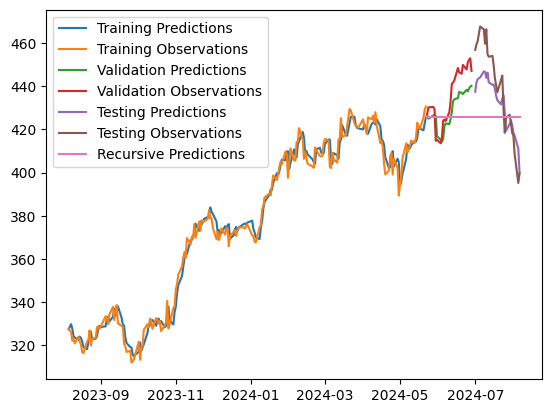

In [37]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

In [ ]:


# Points on why the LSTM model might not be performing well for recursive predictions:

# 1. Error Accumulation:
#    - In recursive prediction, each prediction is fed back as input for the next.
#    - Small errors in early predictions accumulate and compound over time, leading to larger deviations later.

# 2. Limited Context:
#    - The LSTM model has a fixed window size (3 in this case).
#    - It only sees a limited history of prices for each prediction, missing potential long-term trends or seasonality.

# 3. Overfitting to Training Data:
#    - The model might be too specialized to the training data and not generalize well to unseen future data.
#    - Regularization techniques or a simpler model could help.

# 4. Stock Market Volatility:
#    - Stock prices are inherently noisy and influenced by many unpredictable factors.
#    - It's difficult for any model to perfectly capture this inherent randomness, especially for long-term predictions.

# 5. Lack of External Factors:
#    - The model only uses historical prices.
#    - It doesn't consider external factors like news events, economic indicators, or company-specific information that could significantly impact stock prices.
